In [3]:
def bubble_sort(n_array):
    for i in range(len(n_array)):
        sorted = True
        for j in range(len(n_array)-1-i):
            if n_array[j] > n_array[j+1]:
                c = n_array[j]
                n_array[j] = n_array[j+1]
                n_array[j+1] = c
                sorted = False
        if sorted == True:
            break
    return n_array

In [4]:
def merges(array):
            new_array = list(array)
            for i in range(len(new_array)):
                new_array[i] = min(array)
                array.remove(min(array))
            return new_array

def merge_sort(n_array):
    if len(n_array) <= 1:
        return n_array
    return merges(merge_sort(n_array[0:int(len(n_array)/2)]) + merge_sort(n_array[int(len(n_array)/2):]))

In [5]:
def unic_elem(n_array):
    unic_elems = {}
    for i in n_array:
        if i in unic_elems:
            unic_elems[i] += 1
        else:
            unic_elems[i] = 1
    return unic_elems

In [55]:
import io

def read(file):
    text = io.open(file, mode='r', encoding='utf-8').readlines()
    text = ''.join(text)
    return text

text = read('сортировки')
print(text)

Какой-то текст, просто текст!!!
Вторая строка


In [56]:
import re

def prepare(text):
    for s in """.,:;"\|/?!><~`@#№$%^&*()[]{}_=+0123456789""":
        text = text.replace(s, ' ')
        
    text = text.replace('- ', ' ')
    text = text.replace(' -', ' ')
    text = text.replace("' ", ' ')
    text = text.replace(" '", ' ')
    text = re.sub('\s', ' ', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('\A | \Z', '', text)
    text = text.lower().split(' ')
    
    return text

text = prepare(" Hello world, i'm Programmer,programmer!")

print(merge_sort(text))
print(bubble_sort(text))
print(unic_elem(text))

['hello', "i'm", 'programmer', 'programmer', 'world']
['hello', "i'm", 'programmer', 'programmer', 'world']
{'hello': 1, "i'm": 1, 'programmer': 2, 'world': 1}


In [57]:
import random as rd
import time

length = [100, 500, 1000, 2000, 5000]
bs_time = []
ms_time = []

for n in length:
    # generation text
    text_orig = ' '.join([''.join([chr(rd.randint(ord('A'), ord('Z'))) for i in range(rd.randint(1,10))]) for j in range(n)])
    
    # time for bubble sort
    time_start_bs = time.perf_counter_ns()
    text = prepare(text_orig)
    text = bubble_sort(text)
    time_end_bs = time.perf_counter_ns()
    
    # time for merge sort
    time_start_ms = time.perf_counter_ns()
    text = prepare(text_orig)
    text = merge_sort(text)
    time_end_ms = time.perf_counter_ns()
    
    bs_time.append(time_end_bs - time_start_bs)
    ms_time.append(time_end_ms - time_start_ms)

   Length      Bubble       Merge
0     100     1298500     1093500
1     500    26135100    15880600
2    1000   108938500    53920000
3    2000   447552300   212520200
4    5000  2855063800  1232167300


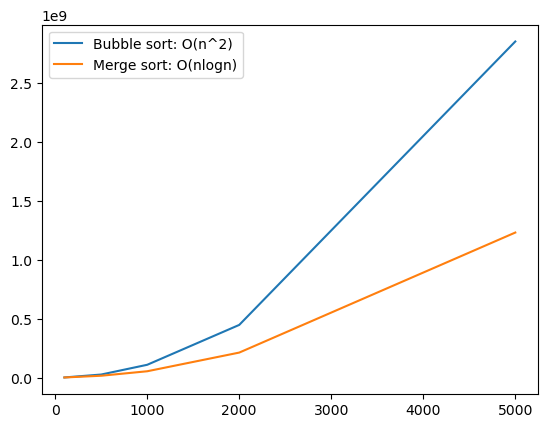

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Length': length, 'Bubble': bs_time, 'Merge': ms_time}
df = pd.DataFrame(data)

print(df)

plt.plot(length, bs_time, label='Bubble sort: O(n^2)')
plt.plot(length, ms_time, label='Merge sort: O(nlogn)')
plt.legend()
plt.show()